# Semester 1 Project Submission



# Elliot

In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Ian

In [2]:
# Your code here - remember to use markdown cells for comments as well!

# Frida

In [3]:
# Importing
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Reading the "Movie info" file
movie_info_df = pd.read_csv('databases/rt.movie_info.tsv', sep='\t', encoding = 'utf-8', index_col=0)
movie_info_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


## Data Cleaning

In [5]:
# Data frame overview. Column information, name-data type.
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [6]:
# Counting missing values
movie_info_df.isna().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [7]:
# Removing duplicate records
movie_info_df = movie_info_df.drop_duplicates()

In [8]:
# Changing NaN values for String "Not Available"
movie_info_df['rating'] = movie_info_df['rating'].fillna('N/A')
movie_info_df['genre'] = movie_info_df['genre'].fillna('N/A')
movie_info_df['director'] = movie_info_df['director'].fillna('N/A')
movie_info_df['theater_date'] = movie_info_df['theater_date'].fillna('N/A')
movie_info_df['dvd_date'] = movie_info_df['dvd_date'].fillna('N/A')
movie_info_df['runtime'] = movie_info_df['runtime'].fillna('N/A')
movie_info_df['studio'] = movie_info_df['studio'].fillna('N/A')
movie_info_df['writer'] = movie_info_df['writer'].fillna('N/A')

In [9]:
# Changing NaN values for 0 in Box Office column
movie_info_df['box_office'] = movie_info_df['box_office'].fillna(0)

# Remmoving commas from Box Office values
movie_info_df['box_office'] = movie_info_df['box_office'].replace({',':''}, regex=True)

# Converting Box Office values into Integers
movie_info_df['box_office'] = movie_info_df['box_office'].astype(float)

In [10]:
# Checking possible Currency values
currency_values = set(movie_info_df.loc[:,"currency"])

# Changing NaN values for "$" in Currency column
movie_info_df['currency'] = movie_info_df['currency'].fillna('$')

In [11]:
"""
Note: The information that we are interested in extracting from this database is the synopsis of each film, 
therefore, we have decided to eliminate those lines that do not have one.
"""
# Dropping rows with no synopsis
cleansed_movie_info = movie_info_df.dropna(subset=['synopsis'])

In [12]:
# Confirming that there in no more NaN values in our cleansed Data Frame
cleansed_movie_info.isna().sum() # No more NaN values! We can start our analysis using the cleansed_movie_info DF

synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [13]:
# Movies with highest earnings
box_o = movie_info_df.sort_values('box_office')
box_o.head(5)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",$,0.0,104 minutes,N/A
1271,"In 2003, respected filmmaker and screenwriter ...",R,Horror,Paul Schrader,N/A,"May 20, 2005","Oct 25, 2005",$,0.0,111 minutes,N/A
1270,NaN,NR,Art House and International|Drama,Xie Jin,Yanzhou Lu,N/A,N/A,$,0.0,120 minutes,N/A
1267,NaN,NR,Action and Adventure|Kids and Family|Science F...,Guy Ritchie,John August|Guy Ritchie,N/A,N/A,$,0.0,N/A,N/A
1266,"Slow-moving and dark, this Klute clone stars T...",R,Drama|Mystery and Suspense,Gordon Willis,N/A,N/A,N/A,$,0.0,96 minutes,N/A


## Creating new Data Frame to work on

In [14]:
"""
Note: In order to analyze the most popular movies per year and genre, 
we created a new Data Frame containing only the Synopsis, Rating, Genres, Theater Date and Box Office.
"""
# Sppliting the theater date, keeping only the year.
only_year = cleansed_movie_info["theater_date"].str.split(",", n = 1, expand = True)

# Creating columns for new DF

years = np.array(only_year[1])
# converting Year string into float
years = years.astype(np.float) 

synopsis = np.array(cleansed_movie_info["synopsis"])
ratings = np.array(cleansed_movie_info["rating"])
box_office = np.array(cleansed_movie_info["box_office"])

# Creating Main Movie Info DF
main_movie_info = pd.DataFrame() 

# Adding columns to new DF
main_movie_info['Synopsis'] = synopsis
main_movie_info['Ratings'] = ratings
main_movie_info['Box Office'] = box_office
main_movie_info['Years'] = years
main_movie_info['Years'] = main_movie_info['Years'].fillna(0)


C:\Users\fmartinezflores\AppData\Local\Temp\ipykernel_17756\3660241732.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  years = years.astype(np.float) # converting Year string into float


In [15]:
#  Sppliting the Genres into different columns
split_genre = cleansed_movie_info["genre"].str.split("|", n = 6, expand = True)

genre1 = np.array(split_genre[0])
genre2 = np.array(split_genre[1])
genre3 = np.array(split_genre[2])
genre4 = np.array(split_genre[3])
genre5 = np.array(split_genre[4])
genre6 = np.array(split_genre[5])
genre7 = np.array(split_genre[6])

# # Adding a column for each genre in the new DF
main_movie_info['Genre 1'] = genre1
main_movie_info['Genre 2'] = genre2
#main_movie_info['Genre 3'] = genre3
#main_movie_info['Genre 4'] = genre4
#main_movie_info['Genre 5'] = genre5
#main_movie_info['Genre 6'] = genre6
#main_movie_info['Genre 7'] = genre7

# main_movie_info overview
main_movie_info.head()

# **AÑADIR NOTA EXPLICANDO PORQUE DECIDÍ DEJAR UNICAMENTE LAS PRIMERAS 2 COLIMNAS DE GÉNERO

,Synopsis,Ratings,Box Office,Years,Genre 1,Genre 2
0,"This gritty, fast-paced, and innovative police...",R,0.0,1971.0,Action and Adventure,Classics
1,"New York City, not-too-distant-future: Eric Pa...",R,600000.0,2012.0,Drama,Science Fiction and Fantasy
2,Illeana Douglas delivers a superb performance ...,R,0.0,1996.0,Drama,Musical and Performing Arts
3,Michael Douglas runs afoul of a treacherous su...,R,0.0,1994.0,Drama,Mystery and Suspense
4,The year is 1942. As the Allies unite overseas...,PG,0.0,2000.0,Drama,Kids and Family


## Analyzing the data

### How many movies have been filmed in the last decades?  

In [33]:
# Preparing data by filtering movies per Decade per Gender
_20sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1920) & (main_movie_info['Years'] <= 1929), 'Genre 1' ]
_30sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1930) & (main_movie_info['Years'] <= 1939), 'Genre 1' ]
_40sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1940) & (main_movie_info['Years'] <= 1949), 'Genre 1' ]
_50sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1950) & (main_movie_info['Years'] <= 1959), 'Genre 1' ]
_60sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1960) & (main_movie_info['Years'] <= 1969), 'Genre 1' ]
_70sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1970) & (main_movie_info['Years'] <= 1979), 'Genre 1' ]
_80sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1980) & (main_movie_info['Years'] <= 1989), 'Genre 1' ]
_90sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1990) & (main_movie_info['Years'] <= 1999), 'Genre 1' ]
_00sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 2000) & (main_movie_info['Years'] <= 2009), 'Genre 1' ]
_2010sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 2010) & (main_movie_info['Years'] <= 2019), 'Genre 1' ]

# Counting movies per decade
decades = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1999, 2000, 2010]
movies_per_decade = [len(_20sfilms),len(_30sfilms),len(_40sfilms),len(_50sfilms),len(_60sfilms),len(_70sfilms),len(_80sfilms),len(_90sfilms),len(_00sfilms),len(_2010sfilms)]

print('-> Movies Per Decade: ')
for x,y in zip(decades,movies_per_decade):
    print(x,y)


-> Movies Per Decade: 
1920 5
1930 14
1940 40
1950 55
1960 72
1970 64
1980 163
1999 266
2000 314
2010 204


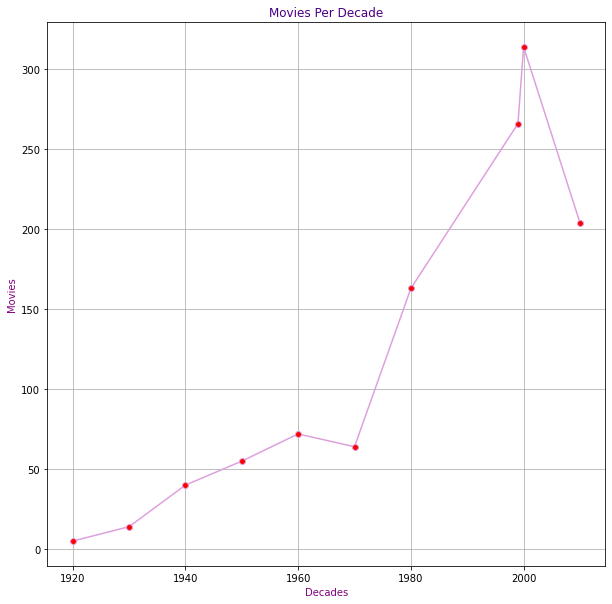

In [26]:
# Visualized data
x_decades = decades
y_count = movies_per_decade

# Graph attributes
plt.figure(figsize=(10,10))
plt.xlabel('Decades', color='purple')
plt.ylabel('Movies', color='purple')
plt.title('Movies Per Decade', color='indigo')

# Plotting
plt.plot(x_decades, y_count, marker = 'o', markerfacecolor = 'r', color = 'plum')
plt.grid(True)
plt.show()



### How many movies have been filmed in the last decades per genre?

In [118]:
# Prepering data for visualization 
_decades_ = [_20sfilms, _30sfilms, _40sfilms, _50sfilms, _60sfilms, _70sfilms, _80sfilms, _90sfilms, _00sfilms, _2010sfilms]
popular_genres_per_decade = []

g_p_d_count = {
    "Action_Adventure" : [],
    "Animation" : [],
    "Anime_Manga" : [],
    "Art_House_International" : [],
    "Classics" : [],
    "Comedy" : [],
    "Cult_Movies" : [],
    "Documentary" : [],
    "Drama" : [],
    "Faith_Spirituality" : [],
    "Gay_Lesbian" : [],
    "Horror" : [],
    "Kids_Family" : [],
    "Musical_Performing_Arts" : [],
    "Mystery_Suspense" : [],
    "Romance" : [],
    "Science_Fiction_Fantasy" : [],
    "Special_Interest" : [],
    "Sports_Fitness" : [],
    "Television" : [],
    "Western" : []
}

# Creating a dictionary of all genres count per decade
for decade in _decades_:
    genres_count = collections.Counter(decade)
    gen_c = dict(genres_count)
    popular_genres_per_decade.append(gen_c)

for decade in popular_genres_per_decade:
    for _genre, _count in decade.items():
        if _genre == 'Action and Adventure':
            g_p_d_count["Action_Adventure"].append(_count)
        elif _genre == 'Art House and International':
            g_p_d_count["Art_House_International"].append(_count)
        elif _genre == 'Classics':
            g_p_d_count["Classics"].append(_count)
        else:
            continue
        
x = pd.DataFrame(g_p_d_count) 

ValueError: All arrays must be of the same length

In [114]:
# Data
r = [0,1]
raw_data = {g_p_d_count["Action_Adventure"], g_p_d_count["Art_House_International"], g_p_d_count["Classics"]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(g_p_d_count["Action_Adventure"],g_p_d_count["Art_House_International"], g_p_d_count["Classics"])]
ActionAdventure = [i / j * 100 for i,j in zip(g_p_d_count["Action_Adventure"], totals)]
ArtHouseInternational = [i / j * 100 for i,j in zip(g_p_d_count["Art_House_International"], totals)]
Classics_ = [i / j * 100 for i,j in zip(g_p_d_count["Classics"], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C')
# Create green Bars
plt.bar(r, ActionAdventure, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, ArtHouseInternational, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, Classics_, bottom=[i+j for i,j in zip(ActionAdventure, ArtHouseInternational)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()

TypeError: unhashable type: 'list'

In [ ]:
 'Action and Adventure', 'Animation', 'Anime and Manga', 
'Art House and International', 'Classics', 'Comedy', 'Cult Movies', 'Documentary', 'Drama', 
'Faith and Spirituality', 'Gay and Lesbian', 'Horror', 'Kids and Family', 'Musical and Performing Arts',
'Mystery and Suspense', 
'N/A', None, 'Romance', 'Science Fiction and Fantasy', 'Special Interest', 'Sports and Fitness', 'Television', 'Western'
   
    
    
    if bike == 'Hero':
    print("bike is Hero")
 
elif bike == "Suzuki":
    print("bike is Suzuki")
 
elif bike == "Yamaha":
    print("bike is Yamaha")
 
else:
    print("Please choose correct answer")

## Finding most popular Genres

In [ ]:
"""
**CHANGE "NONE" -> N/A IN THE GENRE COLUMNS


"""
# Concatenating all genres 
_genres = np.concatenate((genre1, genre2, genre3, genre4, genre5, genre6, genre7), axis=0)

# Creating a list that contains all different generes
all_genres = list(set(_genres))
#all_genres

# Counting frecuency of Genres using Collections Module
genres_count = collections.Counter(_genres)
genres_count.most_common() # sorts the values

# ADD A GRAPH

In [ ]:
import re
import math
import nltk 
nltk.download('stopwords')

## Cleaning Synopsis

In [ ]:

from nltk.corpus import stopwords

def clean_synopsis(word, stop_words):
    word = word.lower()
    words = re.findall('[a-záéíóúüñ]+', word)
    new_word = [w for w in words if ((not w in stop_words) and len(w)>=3 and len(w)<=24)]
    return new_word

s_w = stopwords.words('english')
#stops = set(stopwords.words('english'))
#print(stops)
s_w.extend(['film','one'])
vocabulary = []


for synopsis in main_movie_info["Synopsis"] :
    s = clean_synopsis(synopsis.strip(),s_w)
    vocabulary.extend(s)

#print(vocabulary)

vocabulary_count = collections.Counter(vocabulary)
vocabulary_count.most_common() # sorts the values


# Enrique

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

# John

In [ ]:
# Your code here - remember to use markdown cells for comments as well!